# <span style="font-family: Arial, sans-serif; color:#02ff00">Generative Naive Bayes</span>

<span style="font-family: Arial, sans-serif; color:navyblue">Author: <a href="https://github.com/deburky" title="GitHub link">https://github.com/deburky</a></span>

## Datasets

In [335]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist


def generate_datasets(dataset_name='mnist'):
    # Load the chosen dataset
    if dataset_name == 'mnist':
        # Load MNIST from sklearn
        digits = datasets.load_digits()
        X, y = digits.data, digits.target
        
    elif dataset_name == 'fashion_mnist':
        # Load Fashion MNIST from Keras
        (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
        X, y = np.vstack([X_train, X_test]), np.hstack([y_train, y_test])
        X = X.reshape(X.shape[0], -1)

    else:
        raise ValueError("Dataset not recognized.")

    return X, y


dataset_name = 'mnist'
class_to_generate = 3
X, y = generate_datasets(dataset_name)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

## Gaussian Naive Bayes

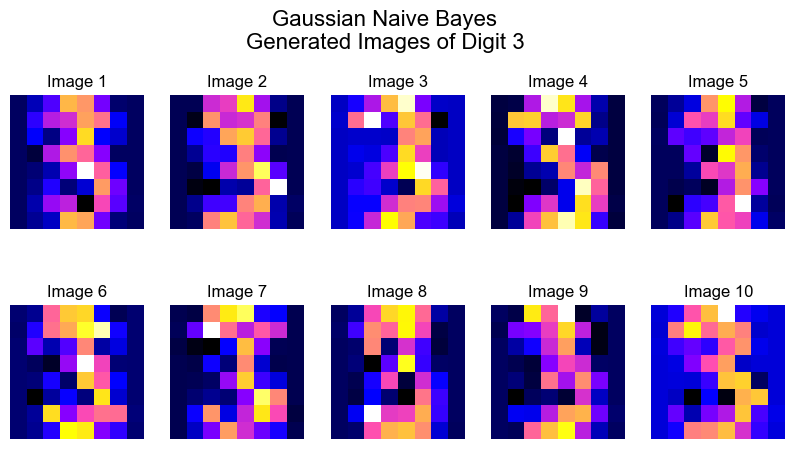

In [336]:
# Gaussian Naive Bayes
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

# set font to Arial
plt.rcParams['font.family'] = 'Arial'

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB(var_smoothing=1e-100)

# Train the classifier
gnb.fit(X_train, y_train)

# Function to generate new images
def generate_new_images(class_label, n_samples=5):
    # Get the mean and variance for each pixel
    mean = gnb.theta_[class_label]
    variance = gnb.var_[class_label]

    return np.random.normal(mean, np.sqrt(variance), (n_samples, mean.size))

# Generate new images for a specific class
new_images = generate_new_images(class_label=class_to_generate, n_samples=10)

# Ensure correct image size for Fashion MNIST (28x28)
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    if dataset_name == 'fashion_mnist':
        ax.imshow(new_images[i].reshape(28, 28), cmap='gnuplot2', interpolation='none')
    else:
        ax.imshow(new_images[i].reshape(8, 8), cmap='gnuplot2', interpolation='none')
    ax.set_title(f'Image {i+1}')
    ax.axis('off')
plt.suptitle(f'Gaussian Naive Bayes\nGenerated Images of Digit {class_to_generate}', y=1.01, fontsize=16)
plt.savefig('generated_images/gnb_generated_images.png', dpi=1000, bbox_inches='tight')
plt.show()

## Bernoulli Naive Bayes

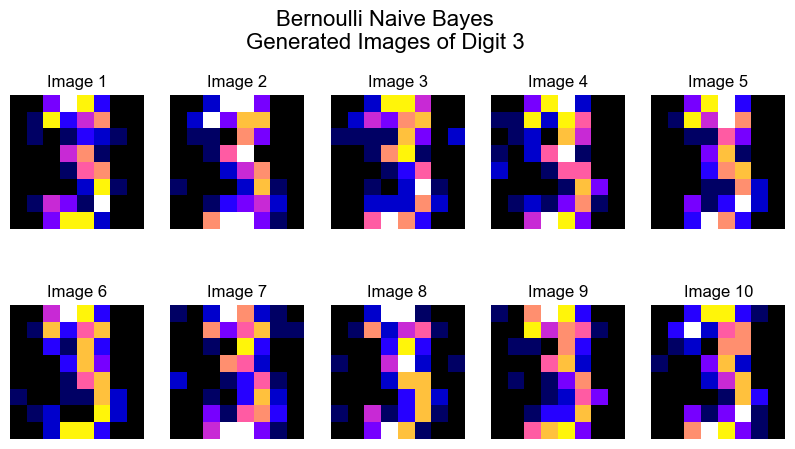

In [337]:
# Bernoulli Naive Bayes
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB

# Set font to Arial for plots
plt.rcParams['font.family'] = 'Arial'

# Initialize the Bernoulli Naive Bayes classifier
bnb = BernoulliNB(binarize=10)

# Train the classifier
bnb.fit(X_train, y_train)

# Function to generate new binary images with a probability cutoff
def generate_new_images_bayes(class_label, n_samples=5, probability_cutoff=0.5):
    # Get the log probabilities for each pixel given the class
    log_prob_white = bnb.feature_log_prob_[class_label]  # log P(pixel=1|class)
    log_prob_black = np.log(1 - np.exp(log_prob_white))  # log P(pixel=0|class)

    # Calculate odds ratio or Bayes factor for each pixel being white (1) vs black (0)
    odds_ratio = np.exp(log_prob_white - log_prob_black)

    # Calculate pixel probabilities from odds ratio
    pixel_probabilities = odds_ratio / (1 + odds_ratio)  # P(pixel=1) from odds

    # Apply cutoff: any pixel probability below the cutoff is set to black (0)
    pixel_probabilities[pixel_probabilities < probability_cutoff] = 0

    # Generate new samples by sampling each pixel based on the adjusted probabilities
    new_images = []
    for _ in range(n_samples):
        # For pixels above cutoff, sample from the binomial distribution
        sampled_image = np.random.binomial(10, pixel_probabilities)
        new_images.append(sampled_image)

    return np.array(new_images)

# Generate new images for a specific class with the cutoff
new_images = generate_new_images_bayes(class_label=class_to_generate, probability_cutoff=0.01, n_samples=10)

# Visualize the generated images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    if dataset_name == 'fashion_mnist':
        ax.imshow(new_images[i].reshape(28, 28), cmap='gnuplot2', interpolation='none')
    else:
        ax.imshow(new_images[i].reshape(8, 8), cmap='gnuplot2', interpolation='none')
    ax.set_title(f'Image {i+1}')
    ax.axis('off')
plt.suptitle(f'Bernoulli Naive Bayes\nGenerated Images of Digit {class_to_generate}', y=1.01, fontsize=16)
plt.savefig('generated_images/bnb_generated_images.png', dpi=1000, bbox_inches='tight')
plt.show()

## WOE Naive Bayes

/Users/deburky/Library/Caches/pypoetry/virtualenvs/python-ml-projects-QQGQytla-py3.10/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:263: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(
/Users/deburky/Library/Caches/pypoetry/virtualenvs/python-ml-projects-QQGQytla-py3.10/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:263: UserWarning: Feature 32 is constant and will be replaced with 0.
  warnings.warn(
/Users/deburky/Library/Caches/pypoetry/virtualenvs/python-ml-projects-QQGQytla-py3.10/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:263: UserWarning: Feature 39 is constant and will be replaced with 0.
  warnings.warn(
/var/folders/k_/yz8rvp25185_js60dw8vhnj40000gn/T/ipykernel_46822/848146110.py:38: RuntimeWarning: divide by zero encountered in divide
  (prob_events / prob_events.sum())


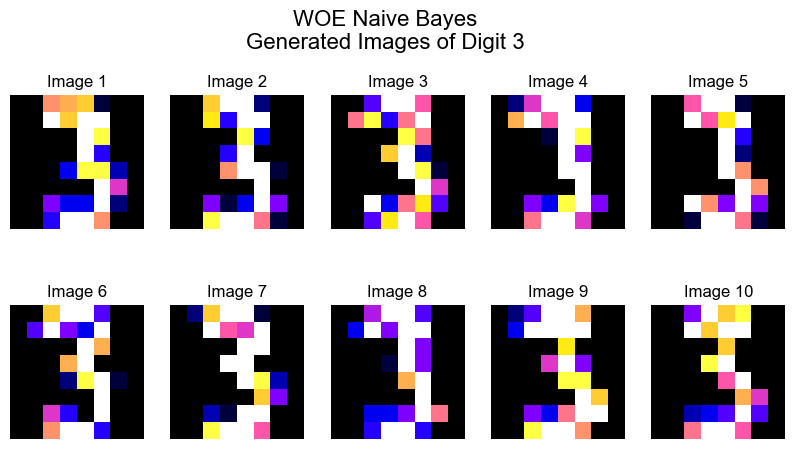

In [347]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

# Set font to Arial for plots
plt.rcParams['font.family'] = 'Arial'

# Discretize pixel values into bins (0 to n_bins-1)
n_bins = 18
kbd = KBinsDiscretizer(n_bins=n_bins, encode="ordinal", strategy="uniform")
X_discretized = kbd.fit_transform(X).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_discretized, y, test_size=0.5, random_state=42
)

# Function to calculate WOE with adjustment for zero counts
def calculate_woe(class_label, X_train, y_train, epsilon=1e-1):
    class_data = X_train[y_train == class_label]
    pixel_woe = []

    # Class prior for the specified class
    class_prior = class_data.shape[0] / X_train.shape[0]

    for pixel_idx in range(class_data.shape[1]):
        # Count occurrences of each bin category for events and non-events
        counts, _ = np.histogram(
            class_data[:, pixel_idx], bins=n_bins, range=(0, n_bins)
        )
        prob_events = counts / class_data.shape[0]
        prob_non_events = 1 - prob_events

        # Avoid division by zero by using epsilon
        woe = np.log(
            np.where(
                (prob_events != 0) & (prob_non_events != 0),
                (prob_events / prob_events.sum())
                / (prob_non_events / prob_non_events.sum()),
                ((prob_events + epsilon) / (prob_events.sum() + epsilon * n_bins))
                / (
                    (prob_non_events + epsilon)
                    / (prob_non_events.sum() + epsilon * n_bins)
                ),
            )
        )

        # Add class prior to WOE and store the result
        log_class_prior = np.log(class_prior / (1 - class_prior))
        adjusted_woe = woe + log_class_prior
        pixel_woe.append(adjusted_woe)

    return np.array(pixel_woe)

# Function to generate new images using WOE adjusted with class priors
def generate_images_using_woe(class_label, n_samples=5):
    # Calculate WOE with class-specific priors for the specified class
    woe_values = calculate_woe(class_label, X_train, y_train)

    # Convert adjusted WOE to odds ratio
    probs = np.exp(woe_values) / np.exp(-woe_values)

    # Generate new images by sampling based on adjusted probabilities
    new_images = []
    for _ in range(n_samples):
        sampled_image = []
        for pixel_probs in probs:
            pixel_probs = pixel_probs / pixel_probs.sum()  # Normalize
            pixel_value = np.random.choice(range(n_bins), p=pixel_probs)  # Sample bin
            sampled_image.append(pixel_value)
        new_images.append(sampled_image)

    # Scale bin indices to grayscale intensities
    new_images = np.array(new_images)
    max_grayscale_value = 16
    return (new_images / (n_bins - 1)) * max_grayscale_value

# Generate new images for the specified digit class using WOE with class priors
new_images = generate_images_using_woe(class_label=class_to_generate, n_samples=10)

# Visualize the generated images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    if dataset_name == 'fashion_mnist':
        ax.imshow(new_images[i].reshape(28, 28), cmap='gnuplot2', interpolation='none')
    else:
        ax.imshow(new_images[i].reshape(8, 8), cmap='gnuplot2', interpolation='none')
    ax.set_title(f"Image {i+1}")
    ax.axis("off")
plt.suptitle(f'WOE Naive Bayes\nGenerated Images of Digit {class_to_generate}', y=1.01, fontsize=16)
plt.savefig('generated_images/woenb_generated_images.png', dpi=1000, bbox_inches='tight')
plt.show()